In [ ]:
import os, sys, glob
import numpy as np
import pandas as pd

import keras
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense,Dropout,Bidirectional,TimeDistributed,LeakyReLU
from keras.models import Model,Sequential
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
AFFECTIVE_DATA_FOLDER = "/content/drive/My Drive/Affective Datasets/"
AFFECTIVE_MW_DATA_FOLDER = AFFECTIVE_DATA_FOLDER + 'MentalWorkload/'
os.chdir(AFFECTIVE_MW_DATA_FOLDER)
params = {'EDA': 4, 'BVP': 64, 'TEMP': 4}

In [ ]:
labels_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + "Labels.csv")
eda_df = pd.read_csv(AFFECTIVE_DATA_FOLDER + 'EDA_info.csv')
temp_df = pd.read_csv(AFFECTIVE_DATA_FOLDER + 'TEMP_info.csv')
bvp_df = pd.read_csv(AFFECTIVE_DATA_FOLDER + 'BVP_info.csv')
dfs = {}
dfs['EDA'] = eda_df
dfs['BVP'] = bvp_df
dfs['TEMP'] = temp_df

In [ ]:
for file in glob.glob("*.csv"):
  if file.startswith('S') and 'temp' in file: #and 'acc' not in file:
    fn = (file.split('.')[0]).split('_')
    param, subjectId = fn[1].upper(), int(fn[0][1:])
    param = 'TEMP'
    fs = params[param]
    param_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + file)
    param_df.rename({'x': 'value', 'm': 'marker'}, axis=1, inplace=True)
    idx = temp_df.shape[0]
    sub_labels_df = labels_df[(labels_df['Participant ID'] == (1000 + subjectId))]
    len = sub_labels_df.shape[0] #6
    if (len > 0):
      session_lbls = sub_labels_df['mwpw_labels'].tolist()
      #
      for session_idx in range(len):
        print("DOING-->",fn, " SESION-", session_idx)
        start_tm = ((18*session_idx) + 3) * 60 
        for index, row in param_df.iterrows():
          if (row['tv'] >= start_tm):
            start_idx = index
            break    
        end_idx =  start_idx +  10*60*fs
        #
        new_row = {'id': idx, 'file_location': 'MW/' + file, 'startRowIndex':start_idx, 'endRowIndex':end_idx, 'label': session_lbls[session_idx], 'pid': 'MW_'+ str(subjectId), 'file_key':'value','application':'MW'}
        temp_df = temp_df.append(new_row, ignore_index=True)
        idx = idx + 1
        #
temp_df.to_csv(AFFECTIVE_DATA_FOLDER + 'TEMP_info.csv', index = False) 

DOING--> ['S02', 'temp']  SESION- 0
DOING--> ['S02', 'temp']  SESION- 1
DOING--> ['S02', 'temp']  SESION- 2
DOING--> ['S02', 'temp']  SESION- 3
DOING--> ['S02', 'temp']  SESION- 4
DOING--> ['S02', 'temp']  SESION- 5
DOING--> ['S10', 'temp']  SESION- 0
DOING--> ['S10', 'temp']  SESION- 1
DOING--> ['S10', 'temp']  SESION- 2
DOING--> ['S10', 'temp']  SESION- 3
DOING--> ['S10', 'temp']  SESION- 4
DOING--> ['S10', 'temp']  SESION- 5
DOING--> ['S04', 'temp']  SESION- 0
DOING--> ['S04', 'temp']  SESION- 1
DOING--> ['S04', 'temp']  SESION- 2
DOING--> ['S04', 'temp']  SESION- 3
DOING--> ['S04', 'temp']  SESION- 4
DOING--> ['S04', 'temp']  SESION- 5
DOING--> ['S07', 'temp']  SESION- 0
DOING--> ['S07', 'temp']  SESION- 1
DOING--> ['S07', 'temp']  SESION- 2
DOING--> ['S07', 'temp']  SESION- 3
DOING--> ['S07', 'temp']  SESION- 4
DOING--> ['S07', 'temp']  SESION- 5
DOING--> ['S09', 'temp']  SESION- 0
DOING--> ['S09', 'temp']  SESION- 1
DOING--> ['S09', 'temp']  SESION- 2
DOING--> ['S09', 'temp']  SE

In [ ]:
for file in glob.glob("*.csv"):
  if file.startswith('S') and 'gsr' in file: #and 'acc' not in file:
    fn = (file.split('.')[0]).split('_')
    param, subjectId = fn[1].upper(), int(fn[0][1:])
    param = 'EDA'
    fs = params[param]
    param_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + file)
    param_df.rename({'x': 'value', 'm': 'marker'}, axis=1, inplace=True)
    idx = eda_df.shape[0]
    sub_labels_df = labels_df[(labels_df['Participant ID'] == (1000 + subjectId))]
    len = sub_labels_df.shape[0] #6
    if (len > 0):
      session_lbls = sub_labels_df['mw_labels'].tolist()
      #
      for session_idx in range(len):
        print("DOING-->",fn, " SESION-", session_idx)
        start_tm = ((18*session_idx) + 3) * 60 
        for index, row in param_df.iterrows():
          if (row['tv'] >= start_tm):
            start_idx = index
            break    
        end_idx =  start_idx +  10*60*fs
        #
        new_row = {'id': idx, 'file_location': 'MW/' + file, 'startRowIndex':start_idx, 'endRowIndex':end_idx, 'label': session_lbls[session_idx], 'pid': 'MW_'+ str(subjectId), 'file_key':'value','application':'MW'}
        eda_df = eda_df.append(new_row, ignore_index=True)
        idx = idx + 1
        #
eda_df.to_csv(AFFECTIVE_DATA_FOLDER + 'EDA_info.csv', index = False) 

DOING--> ['S02', 'gsr']  SESION- 0
DOING--> ['S02', 'gsr']  SESION- 1
DOING--> ['S02', 'gsr']  SESION- 2
DOING--> ['S02', 'gsr']  SESION- 3
DOING--> ['S02', 'gsr']  SESION- 4
DOING--> ['S02', 'gsr']  SESION- 5
DOING--> ['S04', 'gsr']  SESION- 0
DOING--> ['S04', 'gsr']  SESION- 1
DOING--> ['S04', 'gsr']  SESION- 2
DOING--> ['S04', 'gsr']  SESION- 3
DOING--> ['S04', 'gsr']  SESION- 4
DOING--> ['S04', 'gsr']  SESION- 5
DOING--> ['S03', 'gsr']  SESION- 0
DOING--> ['S03', 'gsr']  SESION- 1
DOING--> ['S03', 'gsr']  SESION- 2
DOING--> ['S03', 'gsr']  SESION- 3
DOING--> ['S03', 'gsr']  SESION- 4
DOING--> ['S03', 'gsr']  SESION- 5
DOING--> ['S05', 'gsr']  SESION- 0
DOING--> ['S05', 'gsr']  SESION- 1
DOING--> ['S05', 'gsr']  SESION- 2
DOING--> ['S05', 'gsr']  SESION- 3
DOING--> ['S05', 'gsr']  SESION- 4
DOING--> ['S05', 'gsr']  SESION- 5
DOING--> ['S08', 'gsr']  SESION- 0
DOING--> ['S08', 'gsr']  SESION- 1
DOING--> ['S08', 'gsr']  SESION- 2
DOING--> ['S08', 'gsr']  SESION- 3
DOING--> ['S08', 'gs

In [ ]:
for file in glob.glob("*.csv"):
  if file.startswith('S') and 'bvp' in file: #and 'acc' not in file:
    fn = (file.split('.')[0]).split('_')
    param, subjectId = fn[1].upper(), int(fn[0][1:])
    param = 'BVP'
    fs = params[param]
    param_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + file)
    param_df.rename({'x': 'value', 'm': 'marker'}, axis=1, inplace=True)
    idx = bvp_df.shape[0]
    sub_labels_df = labels_df[(labels_df['Participant ID'] == (1000 + subjectId))]
    len = sub_labels_df.shape[0] #6
    if (len > 0):
      session_lbls = sub_labels_df['mw_labels'].tolist()
      #
      for session_idx in range(len):
        print("DOING-->",fn, " SESION-", session_idx)
        start_tm = ((18*session_idx) + 3) * 60 
        for index, row in param_df.iterrows():
          if (row['tv'] >= start_tm):
            start_idx = index
            break    
        end_idx =  start_idx +  10*60*fs
        #
        new_row = {'id': idx, 'file_location': 'MW/' + file, 'startRowIndex':start_idx, 'endRowIndex':end_idx, 'label': session_lbls[session_idx], 'pid': 'MW_'+ str(subjectId), 'file_key':'value','application':'MW'}
        bvp_df = bvp_df.append(new_row, ignore_index=True)
        idx = idx + 1
        #
bvp_df.to_csv(AFFECTIVE_DATA_FOLDER + 'BVP_info.csv', index = False) 

DOING--> ['S02', 'bvp']  SESION- 0
DOING--> ['S02', 'bvp']  SESION- 1
DOING--> ['S02', 'bvp']  SESION- 2
DOING--> ['S02', 'bvp']  SESION- 3
DOING--> ['S02', 'bvp']  SESION- 4
DOING--> ['S02', 'bvp']  SESION- 5
DOING--> ['S03', 'bvp']  SESION- 0
DOING--> ['S03', 'bvp']  SESION- 1
DOING--> ['S03', 'bvp']  SESION- 2
DOING--> ['S03', 'bvp']  SESION- 3
DOING--> ['S03', 'bvp']  SESION- 4
DOING--> ['S03', 'bvp']  SESION- 5
DOING--> ['S04', 'bvp']  SESION- 0
DOING--> ['S04', 'bvp']  SESION- 1
DOING--> ['S04', 'bvp']  SESION- 2
DOING--> ['S04', 'bvp']  SESION- 3
DOING--> ['S04', 'bvp']  SESION- 4
DOING--> ['S04', 'bvp']  SESION- 5
DOING--> ['S05', 'bvp']  SESION- 0
DOING--> ['S05', 'bvp']  SESION- 1
DOING--> ['S05', 'bvp']  SESION- 2
DOING--> ['S05', 'bvp']  SESION- 3
DOING--> ['S05', 'bvp']  SESION- 4
DOING--> ['S05', 'bvp']  SESION- 5
DOING--> ['S06', 'bvp']  SESION- 0
DOING--> ['S06', 'bvp']  SESION- 1
DOING--> ['S06', 'bvp']  SESION- 2
DOING--> ['S06', 'bvp']  SESION- 3
DOING--> ['S06', 'bv

In [ ]:
df.to_csv(AFFECTIVE_DATA_FOLDER + 'TEMP_info.csv', index = False) 

In [ ]:
eda_df.to_csv(AFFECTIVE_DATA_FOLDER + 'EDA_info.csv', index = False) 
bvp_df.to_csv(AFFECTIVE_DATA_FOLDER + 'BVP_info.csv', index = False) 
temp_df.to_csv(AFFECTIVE_DATA_FOLDER + 'TEMP_info.csv', index = False) 

In [ ]:
df.to_csv(AFFECTIVE_DATA_FOLDER + 'BVP_info.csv', index = False) 

In [ ]:
bvp_df

,id,file_location,startRowIndex,endRowIndex,label,pid,file_key,anxiety_state,anxiety_before_STAI,anxiety_before_CAI,anxiety_after_STAI,anxiety_after_CAI,anxiety_after_SAES,application
0,0,Stress1/BVP_2.csv,0,73215,1,Stress1_2,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
1,1,Stress1/BVP_3.csv,0,72959,1,Stress1_3,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
2,2,Stress1/BVP_4.csv,0,74111,1,Stress1_4,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
3,3,Stress1/BVP_4.csv,74112,95359,3,Stress1_4,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
4,4,Stress1/BVP_5.csv,0,76671,1,Stress1_5,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,Anxiety/TEST08/E4/P046/BVP_PPT.xlsx,0,18590,-1,Anxiety_46,BVP,TEST08,39,57,-1.0,-1.0,54.0,Anxiety
548,548,Anxiety/TEST08/E4/P071/BVP_PPT.xlsx,0,15364,-1,Anxiety_71,BVP,TEST08,37,47,-1.0,-1.0,52.0,Anxiety
549,549,Anxiety/TEST08/E4/P037/BVP_PPT.xlsx,0,22933,-1,Anxiety_37,BVP,TEST08,28,39,-1.0,-1.0,34.0,Anxiety
550,550,Anxiety/TEST08/E4/P039/BVP_PPT.xlsx,0,11545,-1,Anxiety_39,BVP,TEST08,32,43,-1.0,-1.0,52.0,Anxiety


In [ ]:
param_df

,value,marker,ts,tv
0,35.11,0,1.503064e+09,0.00
1,35.11,0,1.503064e+09,0.25
2,35.11,0,1.503064e+09,0.50
3,35.11,0,1.503064e+09,0.75
4,35.09,0,1.503064e+09,1.00
...,...,...,...,...
6851,35.43,0,1.503066e+09,1712.75
6852,35.45,0,1.503066e+09,1713.00
6853,35.45,0,1.503066e+09,1713.25
6854,35.45,0,1.503066e+09,1713.50


In [ ]:
param_df.shape

(6856, 4)

In [ ]:
#end

In [ ]:
labels_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + "Labels.csv")

In [ ]:
labels_df = labels_df[(labels_df['Participant ID'] == (1000 + subjectId))]
session_lbls = labels_df['mw_labels'].tolist() 

In [ ]:
for session_idx in range(6):
  start_tm = ((18*session_idx) + 3) * 60 
  for index, row in param_df.iterrows():
    if (row['tv'] >= start_tm):
      start_idx = index
      break    
  end_idx =  start_idx +  10*60*fs
  #print(start_idx,end_idx,start_tm,param_df.tv.iloc[end_idx])

In [ ]:
eda_df = pd.read_csv(AFFECTIVE_DATA_FOLDER + 'EDA_info.csv')
temp_df = pd.read_csv(AFFECTIVE_DATA_FOLDER + 'TEMP_info.csv')
bvp_df = pd.read_csv(AFFECTIVE_DATA_FOLDER + 'BVP_info.csv')

In [ ]:
eda_df.columns

Index(['id', 'file_location', 'startRowIndex', 'endRowIndex', 'label', 'pid',
       'file_key', 'anxiety_state', 'anxiety_before_STAI',
       'anxiety_before_CAI', 'anxiety_after_STAI', 'anxiety_after_CAI',
       'anxiety_after_SAES', 'application'],
      dtype='object')

In [ ]:
dfs = {}
dfs['EDA'] = eda_df
dfs['BVP'] = bvp_df
dfs['TEMP'] = temp_df

In [ ]:
df = dfs[param]
idx = df.shape[0]

In [ ]:
new_row = {'id': idx, 'file_location': 'MW/' + file, 'startRowIndex':start_idx, 'endRowIndex':end_idx, 'label': session_lbls[session_idx], 'pid': 'MW_'+ str(subjectId), 'file_key':'value','application':'MW'}

In [ ]:
new_row['anxiety_state'] = ''
new_row['anxiety_before_STAI'] = -1
new_row['anxiety_before_CAI'] = -1
new_row['anxiety_after_STAI'] = -1
new_row['anxiety_after_CAI'] = -1
new_row['anxiety_after_SAES'] = -1

In [ ]:
print(new_row)
df = df.append(new_row, ignore_index=True)
idx = idx + 1

{'id': 619, 'file_location': 'MW/S02_temp.csv', 'startRowIndex': 22320, 'endRowIndex': 24720, 'label': 1.0, 'pid': 'MW_2', 'file_key': 'value', 'application': 'MW', 'anxiety_state': '', 'anxiety_before_STAI': -1, 'anxiety_before_CAI': -1, 'anxiety_after_STAI': -1, 'anxiety_after_CAI': -1, 'anxiety_after_SAES': -1}


In [ ]:
df

,id,file_location,startRowIndex,endRowIndex,label,pid,file_key,anxiety_state,anxiety_before_STAI,anxiety_before_CAI,anxiety_after_STAI,anxiety_after_CAI,anxiety_after_SAES,application
0,0,Stress1/TEMP_2.csv,0,4575,1.0,Stress1_2,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
1,1,Stress1/TEMP_3.csv,0,4559,1.0,Stress1_3,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
2,2,Stress1/TEMP_4.csv,0,4631,1.0,Stress1_4,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
3,3,Stress1/TEMP_4.csv,4632,5959,3.0,Stress1_4,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
4,4,Stress1/TEMP_5.csv,0,4791,1.0,Stress1_5,value,NaN,-1,-1,-1.0,-1.0,-1.0,Stress1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615,Anxiety/TEST08/E4/P071/TEMP_PPT.xlsx,0,959,-1.0,Anxiety_71,TEMP,TEST08,37,47,-1.0,-1.0,52.0,Anxiety
616,616,Anxiety/TEST08/E4/P037/TEMP_PPT.xlsx,0,1433,-1.0,Anxiety_37,TEMP,TEST08,28,39,-1.0,-1.0,34.0,Anxiety
617,617,Anxiety/TEST08/E4/P039/TEMP_PPT.xlsx,0,721,-1.0,Anxiety_39,TEMP,TEST08,32,43,-1.0,-1.0,52.0,Anxiety
618,618,Anxiety/TEST08/E4/P008/TEMP_PPT.xlsx,0,973,-1.0,Anxiety_8,TEMP,TEST08,58,39,-1.0,-1.0,47.0,Anxiety


In [ ]:
#work with lbls and param_df

In [ ]:
session_start_times = [0,1080,2340,3240,4320,5400]
session_end_times = [1080,2160,2940,4320,5400,6480]
session_lbls = labels_df['mw_labels'].tolist() 

In [ ]:
for session_num in range(6):
  start_tm = session_start_times[session_num]
  end_tm = session_end_times[session_num]
  if session_num == 5:
    last_session_tm = param_df.tv.iloc[param_df.shape[0]-1]
    if (last_session_tm < end_tm):
      end_tm = last_session_tm
  break
  #now get dataframe data for the session, with index, and label



In [ ]:
start_idx, end_idx, max_idx = 0,0, (param_df.shape[0]-1)
for index, row in param_df.iterrows():
  if (row['tv'] >= start_tm):
      start_idx = index
      break    

value     3.369000e+01
marker    0.000000e+00
ts        1.494000e+09
tv        0.000000e+00
label     0.000000e+00
Name: 0, dtype: float64

In [ ]:
for j in range(start_idx, max_idx):
  if (param_df.tv.iloc[j] >= end_tm):
    end_idx = j
    break


In [ ]:
param_df.tv.iloc[end_idx]

1080.0

In [ ]:
param_df

,value,marker,ts,tv,label
0,33.69,0,1.494000e+09,0.00,0
1,33.69,0,1.494000e+09,0.25,0
2,33.69,0,1.494000e+09,0.50,0
3,33.69,0,1.494000e+09,0.75,0
4,33.69,0,1.494000e+09,1.00,0
...,...,...,...,...,...
26683,35.09,0,1.494006e+09,6670.75,0
26684,35.09,0,1.494006e+09,6671.00,0
26685,35.09,0,1.494006e+09,6671.25,0
26686,35.09,0,1.494006e+09,6671.50,0


In [ ]:
param_df.tv.iloc[param_df.shape[0]-1]

6671.75

In [ ]:
y = param_df['value'].tolist()
x = param_df['tv'].tolist()

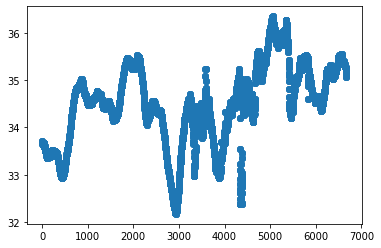

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
#pass to cols

In [ ]:
param_df

,value,marker,ts,tv,label
0,33.69,0,1.494000e+09,0.00,0
1,33.69,0,1.494000e+09,0.25,0
2,33.69,0,1.494000e+09,0.50,0
3,33.69,0,1.494000e+09,0.75,0
4,33.69,0,1.494000e+09,1.00,0
...,...,...,...,...,...
26683,35.09,0,1.494006e+09,6670.75,0
26684,35.09,0,1.494006e+09,6671.00,0
26685,35.09,0,1.494006e+09,6671.25,0
26686,35.09,0,1.494006e+09,6671.50,0


In [ ]:
param_df.marker.unique()

array([ 0, 10, 57, 58, 59, 11, 13, 12, 14])

In [ ]:
marker_idxs = [0]

for index, row in param_df.iterrows():
  if (row['marker'] > 0):
    marker_idxs.append(index)

In [ ]:
marker_idxs

[0,
 120,
 2578,
 3287,
 3528,
 4011,
 4097,
 6587,
 7451,
 7701,
 8183,
 8268,
 10723,
 11356,
 11598,
 12080,
 12147,
 14592,
 15014,
 15256,
 15732,
 15789,
 18242,
 18789,
 19031,
 19514,
 19612,
 22058,
 22914,
 23156,
 23638,
 23688,
 26136]

In [ ]:
param_df['marker'][15733]

0

In [ ]:
i,j = 0,0
idx = 0
max_len = df.shape[0]
while i < max_len and j < max_len:
  lbl_i, time_i, pid_i = df['label_negative_emotions'][i],df['timestamp'][i],df['pid'][i]
  while j < max_len and df['label_negative_emotions'][j] == lbl_i and df['pid'][j] == pid_i:
    j = j + 1
  
  new_row = {'id':'Emo_'+ str(idx), 'file_location': 'Emo_' + param + '_raw.csv', 'startTime':time_i, 'endTime':df['timestamp'][j-1], 'label': lbl_i, 'pid': 'Emo_'+ str(pid_i)}
  info_df = info_df.append(new_row, ignore_index=True)
  idx = idx + 1
  i = j

In [ ]:
##

In [ ]:
param_df

,value,marker,ts,tv,label
0,0.061,0,1.495734e+09,0.00,0
1,0.061,0,1.495734e+09,0.25,0
2,0.063,0,1.495734e+09,0.50,0
3,0.061,0,1.495734e+09,0.75,0
4,0.064,0,1.495734e+09,1.00,0
...,...,...,...,...,...
26149,10.594,0,1.495741e+09,6537.25,0
26150,10.582,0,1.495741e+09,6537.50,0
26151,10.964,0,1.495741e+09,6537.75,0
26152,11.118,0,1.495741e+09,6538.00,0


In [ ]:
labels_df

,Unnamed: 0,Participant ID,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Perceived Exertion (1),Perceived Exertion (2),mw_labels,pw_labels,mwpw_labels
48,48,1009,10,8,10,12,12,9,9,9,0.0,1.0,2.0
49,49,1009,15,10,15,9,14,14,10,9,1.0,1.0,3.0
50,50,1009,8,3,6,17,9,7,7,7,0.0,0.0,0.0
51,51,1009,12,4,14,13,13,11,7,7,1.0,0.0,1.0
52,52,1009,13,19,12,12,14,11,15,15,0.0,2.0,4.0
53,53,1009,14,19,14,13,14,11,15,14,1.0,2.0,5.0


In [ ]:
param_df.marker.unique()

array([ 0, 10, 57, 58, 59, 11, 13, 12, 14])

In [ ]:
####

In [ ]:
labels_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + "Labels.csv")

In [ ]:
subject_df = labels_df[(labels_df['Participant ID'] == (subjectId+1000))]

In [ ]:
info_df = pd.DataFrame(columns=data_cols)

In [ ]:
idx = 0
new_row = {'id':'Mw_'+ str(idx), 'file_location': file, 'startTime':-1, 'endTime':-1, 'label': int(subject_df["mw_labels"].mean() >= 0.5), 'pid': 'Mw_'+ str(subjectId)}

In [ ]:
info_df = info_df.append(new_row, ignore_index=True)
info_df

,id,file_location,startTime,endTime,label,pid
0,Mw_0,S02_bvp.csv,-1,-1,1,Mw_2


In [ ]:
int(subject_df["mw_labels"].mean() >= 0.5)

1

In [ ]:
####

In [ ]:
labels_df.columns

Index(['Unnamed: 0', 'Participant ID', 'Mental Demand', 'Physical Demand',
       'Temporal Demand', 'Performance', 'Effort', 'Frustration',
       'Perceived Exertion (1)', 'Perceived Exertion (2)', 'mw_labels',
       'pw_labels', 'mwpw_labels'],
      dtype='object')

In [ ]:
subject_df

,Unnamed: 0,Participant ID,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Perceived Exertion (1),Perceived Exertion (2),mw_labels,pw_labels,mwpw_labels
6,6,1002,21,10,14,13,21,15,17,12,1.0,1.0,3.0
7,7,1002,21,13,13,14,21,19,18,13,0.0,1.0,2.0
8,8,1002,21,19,21,12,21,20,16,18,1.0,2.0,5.0
9,9,1002,21,20,20,14,21,20,17,17,0.0,2.0,4.0
10,10,1002,20,11,19,14,21,20,14,16,0.0,0.0,0.0
11,11,1002,21,16,21,12,21,21,17,18,1.0,0.0,1.0


In [ ]:
labels_df = pd.read_csv(AFFECTIVE_MW_DATA_FOLDER + "Labels.csv")

In [ ]:
labels_df.mwpw_labels.unique()

array([0., 1., 2., 3., 4., 5.])

In [ ]:
labels_df.pw_labels.unique()

array([0., 1., 2.])